<h1 align='center'> 신호및시스템 중간고사</h1>

<h3 align='center'> 담당교수 : 박섭형</h3>

<p style="text-align: right"> 2021.4.22</p>

**채점**

|문제 | 문제 1 | 문제 2-1 | 문제 2-2 | 문제 3-1 | 문제 3-2 | 합계 |
--|--|--|--|--|--|--
만점 | 20 | 15 | 10 | 15 | 10 | 70
점수 |  |  |  |  |  | 



### 문제 1.

signed 6-bit 데이터를 사용한 연산에서 다음 물음에 답하라.

1) signed 6-bit 데이터형이 표현할 수 있는 정수의 최댓값과 최솟값을 적어라.

  - 최댓값: $2^5 -1 = 31$
  - 최솟값: $-2^5 = -32$
  
2) 다음 연산 결과를 적어라

  - $ 28 + 9 = 37 \rightarrow 37 - 64 = 27$
  - $ -15 - 20 = -35 \rightarrow -35 + 64 = 29$


### 문제 2.

#### 문제 2-1.

구간 $[-4, 4]$에서 다음과 같이 정의되는 함수의 그래프를 그려라. 시변수 $t$와 $x(t)$를 샘플링한 값들을 numpy의 다차원 배열(ndarray)을 이용하여 저장하고, 그래프를 그릴 때 샘플링 주파수는 50 Hz로 설정한다. 시변수 $t$의 구간을 나타내는 숫자의 단위는 초(s)이다.

$$ x(t) = \left\{ \begin{array}{ll}
t + 4 & -4 \le t < -1 \\
3 & -1 \le t < 0 \\
\frac{3}{4}(t-2)^2 & 0 \le t \le 4 \\
 \end{array} \right.
$$

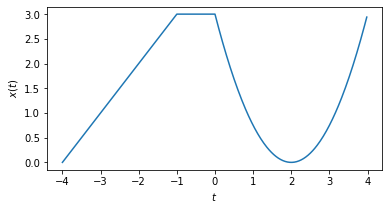

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    if -4 <= t < -1:
        return t + 4
    elif -1 <= t < 0:
        return 3
    elif 0 <= t <= 4:
        return (3/4)*(t-2)**2

vf = np.vectorize(f)
fs = 50
Ts = 1 / fs
t = np.arange(-4, 4.01, Ts)
x = vf(t)

plt.figure(figsize=(6,3))
plt.plot(t, x)
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.savefig('x-t.png')
plt.show()

#### 문제 2-2.

문제 2-1에 주어진 $x(t)$를 다음과 같이 우함수 성분과 기함수 성분의 합으로 표현할 수 있다.

$$x(t) = x_e(t) + x_o(t),$$

여기에서 $x_e(t) = \frac{1}{2}(x(t) + x(-t))$과 $x_o(t) = \frac{1}{2}(x(t) - x(-t))$이다.

$x_e(t)$, $x_o(t)$, $x_e(t)+x_o(t)$의 그래프를 다음과 같이 그리는 프로그램을 작성하라.

(아래 그래프는 $x_e(t)$와 $x_o(t)$의 수식을 구한 후에 그래프를 그리는 것이 아니라 이미  만들어 둔 numpy ndarray x를 이용해서 ndarray x_e와 x_o를 만든 다음에 그래프를 그리는 문제임.)

참고로 다음 그래프가 그려져야 한다.

<img src='x-even-odd.png' width ='80%'></img>

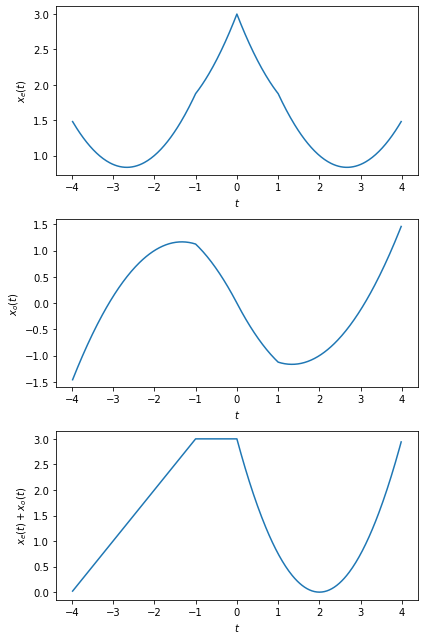

In [14]:
x_e = 0.5*x + 0.5*x[::-1]
x_o = 0.5*x - 0.5*x[::-1]

plt.figure(figsize=(6,9))
plt.subplot(311)
plt.plot(t, x_e)
plt.xlabel("$t$")
plt.ylabel("$x_e(t)$")
plt.subplot(312)
plt.plot(t, x_o)
plt.xlabel("$t$")
plt.ylabel("$x_o(t)$")
plt.subplot(313)
plt.plot(t, x_e + x_o)
plt.xlabel("$t$")
plt.ylabel("$x_e(t) + x_o(t)$")
plt.tight_layout()
plt.savefig('x-even-odd.png')
plt.show()

### 문제 3.

다음과 같이 주어지는 방정식을 생각해 보자.

$$z^4 = j.$$

#### 문제 3-1.

SymPy를 이용해서 이 방정식의 해를 구하고, Markdown cell 안에 직접 이 해를 표시하는 수식을 작성하라.

In [6]:
import sympy as sym
import matplotlib.pyplot as plt
import IPython.display as disp

z = sym.Symbol('z')
z_sol = sym.solve(z**4-(sym.I), z)
for z_ in z_sol:
    disp.display(z_)

-sqrt(1/2 - sqrt(2)/4) + I*sqrt(sqrt(2)/4 + 1/2)

sqrt(1/2 - sqrt(2)/4) - I*sqrt(sqrt(2)/4 + 1/2)

-sqrt(sqrt(2)/4 + 1/2) - I*sqrt(1/2 - sqrt(2)/4)

sqrt(sqrt(2)/4 + 1/2) + I*sqrt(1/2 - sqrt(2)/4)

In [7]:
import sympy as sym
import matplotlib.pyplot as plt
import IPython.display as disp

z = sym.Symbol('z')
z_sol = sym.solve(z**4-1j, z)
for z_ in z_sol:
    disp.display(z_)

-0.923879532511287 - 0.38268343236509*I

-0.38268343236509 + 0.923879532511287*I

0.38268343236509 - 0.923879532511287*I

0.923879532511287 + 0.38268343236509*I

**답**: 이 방정식의 해는 다음과 같다.

$$z_1 = -\sqrt{\frac{1}{2} - \frac{\sqrt{2}}{4}} + j\sqrt{\frac{\sqrt{2}}{4} + \frac{1}{2}}$$
$$z_2 = \sqrt{\frac{1}{2} - \frac{\sqrt{2}}{4}} - j\sqrt{\frac{\sqrt{2}}{4} + \frac{1}{2}}$$
$$z_3 = -\sqrt{\frac{\sqrt{2}}{4} + \frac{1}{2}} - j\sqrt{\frac{1}{2} - \frac{\sqrt{2}}{4}}$$
$$z_4 = \sqrt{\frac{\sqrt{2}}{4} + \frac{1}{2}} + j\sqrt{\frac{1}{2} - \frac{\sqrt{2}}{4}}$$


#### 문제 3-2.

문제 3-1에서 구한 해를 복소 평면에서 점으로 그리는 Python 프로그램을 작성하라.

참고로 다음과 같은 그림을 그려야 한다. 두 축에 label도 작성해야 한다.

<img src='z-solutions.png' width='60%'></img>

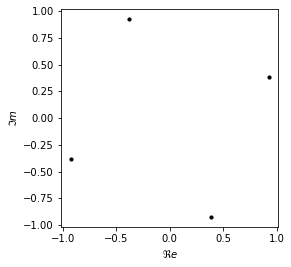

In [3]:
plt.gca().set_aspect(1)
for z_ in z_sol:
    plt.scatter(*z_.as_real_imag(), c='black', s =10)
plt.xlabel("$\Re e$")
plt.ylabel("$\Im m$")
plt.savefig('z-solutions.png')
plt.show()

### 문제 4. (30 점)

정현파를 이용해서 악보 연주하는 프로그램을 완성하고 각자 1분 길이 이상의 곡을 선택해서 악보를 표현하고 연주하는 프로그램을 만들어서 별도로 제출하라.

- 마감일시: 5월 1일 18:00
- 악보의 난이도에 따라서 최대 20 점의 추가 점수 있음.
